Вопросов, пока особо нет

# Отток клиентов телеком компании

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).  

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

###  Описание данных

Данные состоят из файлов, полученных из разных источников:
* `contract.csv` — информация о договоре;
* `personal.csv` — персональные данные клиента;
* `internet.csv` — информация об интернет-услугах;
* `phone.csv` — информация об услугах телефонии.

В данных предоставлены следующие признаки:
+ BeginDate – дата начала пользования услугами,
+ EndDate – дата окончания пользования услугами,
+ Type – тип оплаты: ежемесячный, годовой и тд,
+ PaperlessBilling – безналичный расчет,
+ PaymentMethod – способ оплаты,
+ MonthlyCharges – ежемесячные траты на услуги,
+ TotalCharges – всего потрачено денег на услуги
+ Dependents – наличие иждивенцев
+ Senior Citizen – наличие пенсионного статуса по возрасту
+ Partner – наличие супруга(и)
+ MultipleLines – наличие возможности ведения параллельных линий во время
звонка


Во всех файлах столбец customerID содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020.

### План работы
1. Загрузка и ознакомление с данными
    + загрузка необходимых библиотек
    + загрузка данных
    + ознакомление и обозначение проблем для этапа предобработки
2. Предварительная обработка данных
    + объединение данных
    + обработка пропусков
    + преобразование типов
    + добавление новых признаков
3. Исследовательский анализ
    + проверка распределений данных
    + проверка зависимостей целевой переменной
    + формирование и проверка гипотез
4. Подготовка и обучение модели
    + разбиение данных на тренировочную и тестовую выборки
    + создание несколько моделей (pipeline c CV)
    + обучение и определение лучшей модели
5. Проверка работы модели
    + проверка на тестовой выборке
    + анализ результатов работы модели
6. Вывод
    + вывод
    + параметры финальной модели

### Критерии оценки работы

Основная метрика: **AUC-ROC**\
Дополнительная метрика: **Accuracy**\
Критерии оценки: **AUC-ROC >= 0.85**


## Загрузка и ознакомление с данными

Загрузим необходимые библиотеки

In [73]:
import os
import re
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Зафиксируем глобальные переменные

In [74]:
MY_DIR = 'data/'
YA_DIR = '/datasets/final_provider/'
RANDOM_STATE = 270223

Считаем данные

In [75]:
def search_and_var_naming(dir):
    """
    Search all *.csv files in dir and creat dic varname:filepath
    dir -- directory with data
    sep -- win/lin filepath sep
    """
    csv_files = {}
    for root, dirs, files in os.walk(dir):
        counter = 0
        for file in files:
            if file.endswith(".csv"):
                counter += 1
                csv_files[file.split('.')[0]] = dir + file
        if counter == 0:
            print('В папке отсутствуют файлы формата *.csv')
        else:
            print(f'Количество найденных файлов *.csv: {counter}')
    return csv_files

In [76]:
if os.path.exists(MY_DIR):
    print('Используется локальная папка')
    files_and_path = search_and_var_naming(MY_DIR)
elif os.path.exists(YA_DIR):
    print('Используется репозиторий Yandex')    
    files_and_path = search_and_var_naming(YA_DIR)
else:
    print('Папка с данными не найдена')

Используется локальная папка
Количество найденных файлов *.csv: 4


Преобразуем и присвоим найденным файлам имена в соответствии с их названием

In [77]:
for key in files_and_path:
    exec(f'{key} = pd.read_csv(files_and_path[key])')
    print(key)

contract
internet
personal
phone


In [78]:
files = [contract, internet, personal, phone]

Преобразуем имена колонок в snake_case

In [79]:
for file in files:
    new_columns_name=[]
    for column in file.columns:
        new_columns_name.append(re.sub('(?!^)([A-Z]+)', r'_\1', column).lower())
    file.columns = new_columns_name

### Последовательно изучим общую информацию о всех представленных данных

#### contract

In [80]:
def base_info(df:pd.DataFrame):
    """
    Display some base info about df
    head, tail, info, describe
    """
    print('Head')
    display(df.head())
    print('*'*120)
    print('Tail')
    display(df.tail())
    print('*'*120)   
    print('Info')
    df.info()
    print('*'*120)
    print('Describe')
    display(df.describe(include='all'))


In [81]:
base_info(contract)

Head


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


************************************************************************************************************************
Tail


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5


************************************************************************************************************************
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
************************************************************************************************************************
Describe


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


Явные пропуски отсутствуют. 
+ `begin_date` - необходимо будет преобразовать в формат даты и при анализе проверить утверждение, чем более долгий срок клиент с компанией тем меньшая вероятность его ухода
+ `end_date` - целевой признак, если клиент ушел дата будет обозначена также необходимо преобразовать в формат даты, и преобразовать с `begin_date` в срок обслуживания
+ `total_charges` - проверим на пропуски и преобразуем в числовой
+ `monthly_charges` - тип данных ожидаемый, проверим если средний чек совпадает 'кол-во месяцев' / `total_charges` == `monthly_charges`, то клиент не увеличивал кол-во услуг, меньше -> отказывался, больше -> добавлял

Количество уникальных ID совпадает с количеством строк, следовательно полные дубликаты отсутствуют. Попробывать разбить преобразовать в хэш текстовую часть а цифровую посмотреть может в ней регион, офис и т.д, может быть корреляция с датой то удалим

In [82]:
contract.paperless_billing.unique()

array(['Yes', 'No'], dtype=object)

`paperless_billing` - уникальные значения да/нет

In [83]:
contract.payment_method.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

`payment_method` варианты платежей, проверим на зависимость с `paperless_billing` и на возможность объединения по методу платежа check/automatic

In [84]:
contract.type.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

`type` - тип платежа, логично будет преположить что чем на более длительный срок клиент оплачивает услуги тем меньше вероятность его ухода, проверим при анализе данных

#### internet

In [85]:
base_info(internet)

Head


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


************************************************************************************************************************
Tail


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No
5516,3186-AJIEK,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


************************************************************************************************************************
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
************************************************************************************************************************
Describe


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [86]:
internet.internet_service.unique()

array(['DSL', 'Fiber optic'], dtype=object)

Значений меньше чем в `contract` - не все пользователи пользуются услугой интернет. В столбце internet_service два вида подключения. В остальных подключена ли услуга да/нет
Преобразование типов не требуется

Сделаем проверку для будущего объеденения

In [87]:
len(internet[~internet['customer_id'].isin(contract['customer_id'])])

0

#### personal

In [88]:
base_info(personal)

Head


,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


************************************************************************************************************************
Tail


,customer_id,gender,senior_citizen,partner,dependents
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No


************************************************************************************************************************
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
************************************************************************************************************************
Describe


,customer_id,gender,senior_citizen,partner,dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


In [89]:
personal.gender.unique()

array(['Female', 'Male'], dtype=object)

In [90]:
personal.senior_citizen.unique()

array([0, 1], dtype=int64)

Значения в остальных столбцах да/нет

Проверка

In [91]:
len(personal[~personal['customer_id'].isin(contract['customer_id'])])


0

#### phone

In [92]:
base_info(phone)

Head


,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


************************************************************************************************************************
Tail


,customer_id,multiple_lines
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes
6360,3186-AJIEK,No


************************************************************************************************************************
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
************************************************************************************************************************
Describe


,customer_id,multiple_lines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


phone - содержит информацию о пользователях телефоном и подключена ли услуга нескольких линий

In [93]:
len(phone[~phone['customer_id'].isin(contract['customer_id'])])

0

### Вывод:


В данном разделе мы провели загрузку и предварительное ознакомление с данными. Данные представлены в виде 4х файлов формата *.csv. 
Переименовали столбцы в более удобный формат для работы. Датафреймам присвоили имена соответственно именам файлов из которых загружали

`contract` Данные предоставлены с 2014-02-01 по . 7043 строки  по 8 признаков. Пропуски и дубликаты не найдены. Обнаружены несоответствия типов данных. Из двух столбцов даты начала контракта и его окончания необходимо будет сформировать длительность пользования услугами, и выделить целевую переменную - факт окончания контракта.

`internet` 5517 клиентов с 8-ю признаками. Преобразования не требуются.

`personal` 7043 строки с 5-ю признаками. Признак `senior_citizen` кодирован 1/0 вместо обычного yes/no

`phone` 6361 строка с 2-я признаками

Во всех таблица первичным ключом является `customer_id` по нему будем производить объединение таблиц.

## Предварительная обработка данных

Сведем все данные в единый датафрейм

Перед сведение добавим индикаторные столбцы наличия услуг интернет и телефона

In [94]:
internet['internet_service'] = 'Yes'
phone['phone_service'] = 'Yes'

In [95]:
df = contract.merge(personal, how='left', on='customer_id')
df = df.merge(internet, how='left', on='customer_id')
df = df.merge(phone, how='left', on='customer_id')

In [96]:
pd.DataFrame({'NaNs, %': round((df.isna().mean()*100),2), 
              'NaNs, qty': df.isna().sum()}).style.format('{:.2f}').background_gradient('coolwarm')

,"NaNs, %","NaNs, qty"
customer_id,0.00,0.00
begin_date,0.00,0.00
end_date,0.00,0.00
type,0.00,0.00
paperless_billing,0.00,0.00
payment_method,0.00,0.00
monthly_charges,0.00,0.00
total_charges,0.00,0.00
gender,0.00,0.00
senior_citizen,0.00,0.00


In [97]:
df = df.fillna('No')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   7043 non-null   object 
 13  online_security    7043 non-null   object 
 14  online_backup      7043 non-null   object 
 15  device_protection  7043 non-null   object 
 16  tech_support       7043 

In [99]:
df.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines', 'phone_service'],
      dtype='object')

In [100]:
df['begin_date'] = pd.to_datetime(df.begin_date)

In [101]:
df['target'] = np.where(df.end_date == 'No', 0, 1)

In [102]:
df['end_date'] = pd.to_datetime(df.end_date, errors='coerce')

In [103]:
df['end_date'] = df['end_date'].fillna(pd.Timestamp('2020-02-01'))

In [104]:
df['term'] = (df['end_date'].dt.to_period('m') - df['begin_date'].dt.to_period('m')).apply(lambda x: x.n)

In [105]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,phone_service,target,term
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,Yes,No,No,No,No,No,No,0,1
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.5,Male,0,...,Yes,No,Yes,No,No,No,No,Yes,0,34
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,Yes,Yes,No,No,No,No,No,Yes,1,2
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,Yes,No,Yes,Yes,No,No,No,No,0,45
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,No,No,No,No,No,No,Yes,1,2


In [106]:
df.sort_values('total_charges').head(15)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,phone_service,target,term
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,Female,0,...,Yes,Yes,Yes,No,Yes,Yes,No,Yes,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,Male,0,...,No,No,No,No,No,No,Yes,Yes,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,Female,0,...,No,No,No,No,No,No,No,Yes,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,Male,0,...,No,No,No,No,No,No,No,Yes,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,Male,0,...,No,No,No,No,No,No,No,Yes,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,Male,0,...,No,No,No,No,No,No,No,Yes,0,0
6754,2775-SEFEE,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),61.90,,Male,0,...,Yes,Yes,No,Yes,No,No,Yes,Yes,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,Female,0,...,No,Yes,Yes,Yes,Yes,No,Yes,Yes,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,Female,0,...,Yes,Yes,Yes,Yes,Yes,No,No,No,0,0
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,...,Yes,No,Yes,Yes,Yes,No,No,No,0,0


In [107]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors ='coerce').sort_values()

In [108]:
df.query('begin_date == "2020-02-01"')

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,phone_service,target,term
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,...,Yes,No,Yes,Yes,Yes,No,No,No,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,Male,0,...,No,No,No,No,No,No,No,Yes,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,Female,0,...,Yes,Yes,Yes,No,Yes,Yes,No,Yes,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,Male,0,...,No,No,No,No,No,No,Yes,Yes,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,Female,0,...,Yes,Yes,Yes,Yes,Yes,No,No,No,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,Male,0,...,No,No,No,No,No,No,No,Yes,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,Male,0,...,No,No,No,No,No,No,Yes,Yes,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,Female,0,...,No,No,No,No,No,No,No,Yes,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,Male,0,...,No,No,No,No,No,No,No,Yes,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,Female,0,...,No,Yes,Yes,Yes,Yes,No,Yes,Yes,0,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   7043 non-null   object        
 13  online_security    7043 non-null   object        
 14  online_b

In [110]:
df = df.dropna()

In [111]:
df = df.replace({'Yes': 1, 'No': 0})


In [112]:
df[['num_id', 'text_id']] = df.customer_id.str.split('-', 1, expand= True)

In [113]:
df['num_id'] = df['num_id'].astype(int)

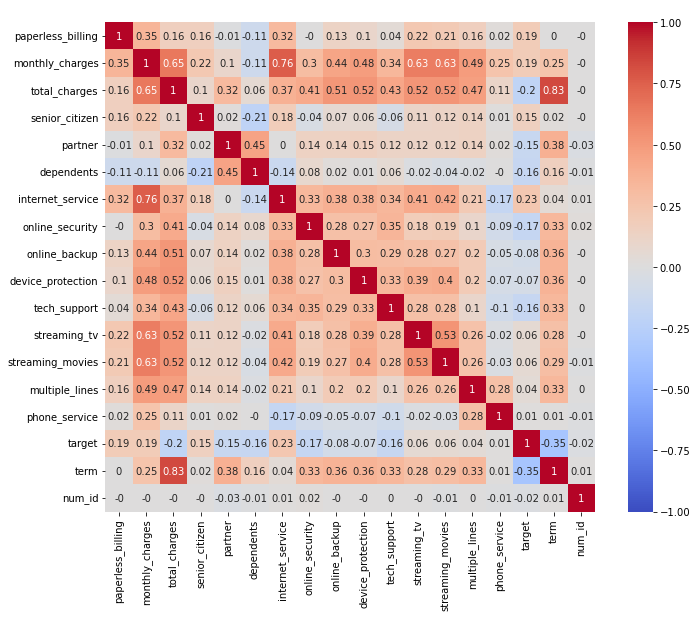

In [114]:
plt.figure(figsize=(12,9))
plt.title(' ')
sns.heatmap(round(df.corr(), 2), 
            annot=True, 
            vmin=-1, 
            vmax=1, 
            center= 0, 
            cmap= 'coolwarm', 
            square=True);

In [115]:
df.describe(include='all')

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,phone_service,target,term,num_id,text_id
count,7032,7032,7032,7032,7032.000000,7032,7032.000000,7032.000000,7032,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032
unique,7032,76,5,3,NaN,4,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7029
top,7590-VHVEG,2014-02-01 00:00:00,2020-02-01 00:00:00,Month-to-month,NaN,Electronic check,NaN,NaN,Male,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CYWMH
freq,1,366,5163,3875,NaN,2365,NaN,NaN,3549,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
first,NaN,2013-10-01 00:00:00,2019-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-01-01 00:00:00,2020-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.592719,NaN,64.798208,2283.300441,NaN,0.162400,...,0.343857,0.290102,0.384386,0.388367,0.421928,0.903299,0.265785,32.421786,4999.087600,NaN
std,NaN,NaN,NaN,NaN,0.491363,NaN,30.085974,2266.771362,NaN,0.368844,...,0.475028,0.453842,0.486484,0.487414,0.493902,0.295571,0.441782,24.545260,2856.786564,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,18.250000,18.800000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,35.587500,401.450000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,2574.500000,NaN


In [118]:
df = df.drop(['begin_date', 'end_date', 'customer_id', 'text_id'], axis=1)

In [132]:
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.utils import shuffle # Миксер
from sklearn.utils.validation import check_is_fitted

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.cluster import KMeans

from catboost import CatBoostClassifier
import shap

In [119]:
X, y = df.drop(['target'], axis=1), df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=47,
    shuffle=True,
    stratify=df['target'])

print('Обучающая выборка:')
print('Доля от общего размера:', round(y_train.shape[0]/df.shape[0], 2))
print('Cтрок, столбцов:', X_train.shape)
print('Доля целевого признака:', round(y_train.mean(), 3))
print('- '*10)


print('Тестовая выборка:')
print('Доля от общего размера:', round(y_test.shape[0]/df.shape[0], 2))
print('Cтрок, столбцов:', X_test.shape)
print('Доля целевого признака:', round(y_test.mean(), 3))
print('-'*30)

Обучающая выборка:
Доля от общего размера: 0.75
Cтрок, столбцов: (5274, 20)
Доля целевого признака: 0.266
- - - - - - - - - - 
Тестовая выборка:
Доля от общего размера: 0.25
Cтрок, столбцов: (1758, 20)
Доля целевого признака: 0.266
------------------------------


In [120]:
categorical = list(X_train.select_dtypes('object').columns)
print(f"Категориальные признаки: {categorical}")

numerical = list(X_train.select_dtypes('number').columns)
print(f"Числовые признаки: {numerical}")

Категориальные признаки: ['type', 'payment_method', 'gender']
Числовые признаки: ['paperless_billing', 'monthly_charges', 'total_charges', 'senior_citizen', 'partner', 'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines', 'phone_service', 'term', 'num_id']


In [136]:
cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

num_pipe = Pipeline([
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer([
    ('cat', cat_pipe, categorical),
    ('num', num_pipe, numerical)
])

pipe = Pipeline(
    [
        ('preprocessor', preprocessor),
        ("regressor", KMeans())
    ]
)


grid = RandomizedSearchCV(pipe, param_grid, n_iter=3 ,cv=3, scoring = 'neg_mean_squared_error', verbose=3)



param_grid = [
    {
        'regressor': [KMeans(n_clusters=2, random_state=RANDOM_STATE)],
        'regressor__n_init': range(10,22,2),
        'regressor__max_iter': range(100,600,100),
        'regressor__algorithm': ['lloyd', 'elkan', 'auto', 'full']
    },
    # {
    #     'regressor': [RandomForestClassifier(random_state=RANDOM_STATE)],
    #     'regressor__max_depth': range(2,9,1),
    #     # 'regressor__n_estimators':range(1,201,10),
    #     # 'regressor__min_samples_split':range(2,52,5),
    #     # 'regressor__min_samples_leaf':range(2,52,5),
    #     # 'regressor__max_features': ['sqrt', 'log2']
    # },
    # {
    #     'regressor': [CatBoostClassifier(random_state=RANDOM_STATE, silent=True)],
    #     # 'regressor__max_iter': [1000],
    #     # 'regressor__class_weight': [None, 'balanced'],
    #     # 'regressor__solver' : ['lbfgs', 'liblinear']
    # }
]

grid = RandomizedSearchCV(pipe, 
                          param_grid, 
                          n_iter=5,
                          cv=5, 
                          scoring='roc_auc',
                          random_state=RANDOM_STATE,
                          verbose=3)

In [138]:
km = KMeans(n_clusters=2, random_state=RANDOM_STATE)

In [140]:
ohe = OneHotEncoder()
X_train_t = ohe.fit_transform(X_train)

In [141]:
km.fit(X_train_t, y_train)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


AttributeError: 'NoneType' object has no attribute 'split'

In [137]:
%%time
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\pipeline.py", line 46, in check
    getattr(self._final_estimator, attr)
AttributeError: 'KMeans' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scor

[CV 1/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=elkan, regressor__max_iter=300, regressor__n_init=14;, score=nan total time=   0.2s
[CV 2/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=elkan, regressor__max_iter=300, regressor__n_init=14;, score=nan total time=   0.0s


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\pipeline.py", line 46, in check
    getattr(self._final_estimator, attr)
AttributeError: 'KMeans' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scor

[CV 3/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=elkan, regressor__max_iter=300, regressor__n_init=14;, score=nan total time=   0.0s
[CV 4/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=elkan, regressor__max_iter=300, regressor__n_init=14;, score=nan total time=   0.0s


Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\pipeline.py", line 46, in check
    getattr(self._final_estimator, attr)
AttributeError: 'KMeans' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scor

[CV 5/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=elkan, regressor__max_iter=300, regressor__n_init=14;, score=nan total time=   0.1s
[CV 1/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=lloyd, regressor__max_iter=200, regressor__n_init=20;, score=nan total time=   0.0s
[CV 2/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=lloyd, regressor__max_iter=200, regressor__n_init=20;, score=nan total time=   0.0s
[CV 3/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=lloyd, regressor__max_iter=200, regressor__n_init=20;, score=nan total time=   0.0s
[CV 4/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=lloyd, regressor__max_iter=200, regressor__n_init=20;, score=nan total time=   0.0s
[CV 5/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=lloyd, regressor__max_iter=200, regressor__n_init=20;, sco

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.


[CV 5/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=full, regressor__max_iter=100, regressor__n_init=20;, score=nan total time=   0.0s
[CV 1/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=lloyd, regressor__max_iter=100, regressor__n_init=18;, score=nan total time=   0.0s
[CV 2/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=lloyd, regressor__max_iter=100, regressor__n_init=18;, score=nan total time=   0.0s
[CV 3/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=lloyd, regressor__max_iter=100, regressor__n_init=18;, score=nan total time=   0.0s
[CV 4/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=lloyd, regressor__max_iter=100, regressor__n_init=18;, score=nan total time=   0.0s
[CV 5/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=lloyd, regressor__max_iter=100, regressor__n_init=18;, scor

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

20 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\s7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "

[CV 2/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=full, regressor__max_iter=400, regressor__n_init=14;, score=nan total time=   0.0s
[CV 3/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=full, regressor__max_iter=400, regressor__n_init=14;, score=nan total time=   0.0s
[CV 4/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=full, regressor__max_iter=400, regressor__n_init=14;, score=nan total time=   0.0s
[CV 5/5] END regressor=KMeans(n_clusters=2, random_state=270223), regressor__algorithm=full, regressor__max_iter=400, regressor__n_init=14;, score=nan total time=   0.0s
Wall time: 1.67 s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['type',
                                                                                'payment_method',
                                                                                'gender']),
                                                                              ('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['paperless_billing',
                                                                                'monthly_charges',
                                                                                'total_charges',
                                                                                'senior_citizen',
                                                                                'partner',
                                                                                'depend...
                                                                                'phone_service',
                                                                                'term',
                                                                                'num_id'])])),
                                             ('regressor', KMeans())]),
                   n_iter=5,
                   param_distributions=[{'regressor': [KMeans(algorithm='elkan',
                                                              n_clusters=2,
                                                              n_init=14,
                                                              random_state=270223)],
                                         'regressor__algorithm': ['lloyd',
                                                                  'elkan',
                                                                  'auto',
                                                                  'full'],
                                         'regressor__max_iter': range(100, 600, 100),
                                         'regressor__n_init': range(10, 22, 2)}],
                   random_state=270223, scoring='roc_auc', verbose=3)

In [123]:
result = pd.DataFrame(grid.cv_results_)

result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,param_regressor,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,0.684684,0.199706,0.064143,0.000845,8,"RandomForestClassifier(max_depth=5, random_sta...","{'regressor__max_depth': 8, 'regressor': Rando...",0.812322,0.796209,0.806635,...,0.005457,1,0.845203,0.835484,0.836575,0.846226,0.850171,0.842732,0.005729,4
1,0.408287,0.001230,0.052877,0.000930,4,"RandomForestClassifier(max_depth=5, random_sta...","{'regressor__max_depth': 4, 'regressor': Rando...",0.782938,0.792417,0.793365,...,0.006155,4,0.835493,0.842099,0.838336,0.851281,0.850032,0.843448,0.006260,3
2,0.488542,0.008822,0.057710,0.001357,6,"RandomForestClassifier(max_depth=5, random_sta...","{'regressor__max_depth': 6, 'regressor': Rando...",0.806635,0.798104,0.800000,...,0.004351,2,0.841525,0.840832,0.839085,0.851072,0.852690,0.845041,0.005664,2
3,0.367399,0.001981,0.050983,0.000192,3,"RandomForestClassifier(max_depth=5, random_sta...","{'regressor__max_depth': 3, 'regressor': Rando...",0.777251,0.779147,0.780095,...,0.007049,5,0.833903,0.839505,0.835991,0.847904,0.847866,0.841034,0.005873,5
4,0.449211,0.005325,0.055891,0.000805,5,"RandomForestClassifier(max_depth=5, random_sta...","{'regressor__max_depth': 5, 'regressor': Rando...",0.797156,0.795261,0.800000,...,0.004369,3,0.841399,0.843889,0.839821,0.850614,0.850651,0.845275,0.004563,1


In [133]:
result = pd.DataFrame(grid.cv_results_)

result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,5.703792,0.197041,0.031393,0.000801,<catboost.core.CatBoostClassifier object at 0x...,{'regressor': <catboost.core.CatBoostClassifie...,0.814218,0.789573,0.796209,0.788626,...,0.009655,1,0.834618,0.826452,0.833301,0.841278,0.845427,0.836215,0.006586,1


In [66]:
explainer = shap.TreeExplainer(grid.best_estimator_.named_steps["regressor"])
shap_values = explainer.shap_values(X_train, y=y_train.values)
shap.summary_plot(shap_values, X_train, plot_type="violin")

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="Month-to-month": Cannot convert 'b'Month-to-month'' to float